---
title: Simulating the Martingale Betting System
author: Ole Petersen
---

Imagine you are in a casino with your best friend and your life savings, playing roulette. Your friend has an awesome idea: "Let's always bet on red. If we lose, we double our bet. Once we win, we have made back all our losses and we start over with our initial bet. We can't lose!"

You are a bit sceptical. In every step, you an equal chance of doubling your bet or losing it, so in expectation, your wealth should stay constant, right? But what's the flaw in your friend's argument?

Let's simulate the betting strategy and see what happens. You don't want to loose it all, so you start with 100$ and begin with the smallest possible bet of 1$. This is done for up to 1000 rounds. If you cannot afford the bet anymore, you leave with what is left, dropping out of the game. This logic is implemented in the following julia code.

In [116]:
#| echo: true
#| output: false

function simulate(initial_money,minimum_bet,rounds)
    money_by_round = zeros(rounds)
    money = initial_money
    bet=minimum_bet
    for i in 1:rounds
        if money < bet
            money_by_round[i:end] .= money
            break
        end
        money_by_round[i] = money
        money -= bet
        if rand() < 0.5
            # win
            money += 2*bet
            bet = minimum_bet
        else
            # lose
            bet *= 2
        end
    end
    return money_by_round
end

simulate (generic function with 1 method)

We simulate the gameplay 10000 times:

In [117]:
#| echo: true
#| output: false
num_simulations = 10000
initial_money = 100
minimum_bet = 1
rounds = 1000
simulations = [simulate(initial_money,minimum_bet,rounds) for i in 1:num_simulations]

10000-element Vector{Vector{Float64}}:
 [100.0, 99.0, 97.0, 101.0, 102.0, 103.0, 102.0, 100.0, 104.0, 105.0  …  42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0]
 [100.0, 99.0, 101.0, 100.0, 98.0, 94.0, 102.0, 103.0, 104.0, 103.0  …  157.0, 157.0, 157.0, 157.0, 157.0, 157.0, 157.0, 157.0, 157.0, 157.0]
 [100.0, 101.0, 102.0, 101.0, 103.0, 104.0, 103.0, 101.0, 105.0, 106.0  …  100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
 [100.0, 99.0, 97.0, 93.0, 85.0, 69.0, 101.0, 102.0, 103.0, 102.0  …  77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0]
 [100.0, 99.0, 101.0, 102.0, 101.0, 99.0, 95.0, 103.0, 104.0, 103.0  …  60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
 [100.0, 101.0, 102.0, 101.0, 99.0, 95.0, 87.0, 103.0, 102.0, 100.0  …  40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
 [100.0, 101.0, 100.0, 98.0, 102.0, 103.0, 104.0, 105.0, 106.0, 105.0  …  35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0]
 [100.0, 99.0

In [118]:
#| echo: false
#| output: false
using Plots, Statistics

Let us analyse the results. First, we plot a histogram of the wealth of the player in different rounds in @fig-histograms. As we can see, in the second round, we won or lost equally often, leaving us at +1 or -1 equally likely. However, starting from round 10, a surprising pattern emerges. In most cases, the net outcome is positive (>100$). However, rarely, we lost most of our money (recall that we stop playing once we cannot use our system anymore). Towards the end, the outcomes become more and more extreme. We are very likely to drop out, but if we don't, we are very likely to have increased our wealth by a factor of 6.

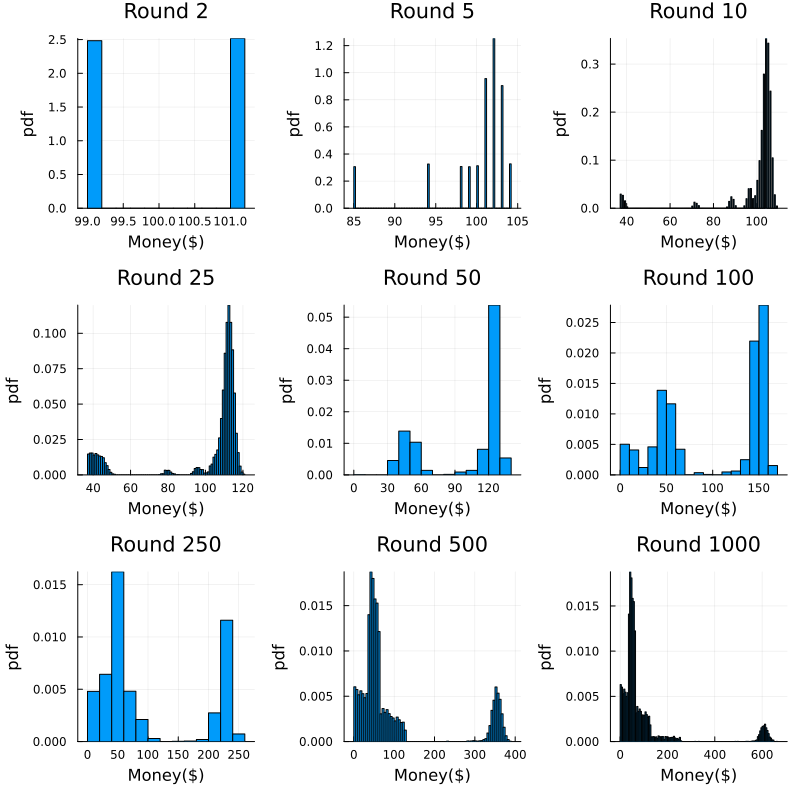

In [119]:
#| echo: false
#| label: fig-histograms
#| fig-cap: Histograms of money at different rounds

round_numbers=[2,5,10,25,50,100, 250, 500, 1000]
plots=[]
for round in round_numbers
    push!(plots, histogram([simulations[i][round] for i in 1:num_simulations],
        normalize=true,
        #bins=50,
        xlabel="Money(\$)",
        ylabel="pdf",
        label=false,
        title="Round $round",
        size=(800,800)))
end
plot(plots...,layout=length(round_numbers),legend=false)

Having understood the probability distributions of the game outcomes, we can now calculate some higher-level statistics. We measure

- the mean wealth to find out if we can make money in expectation with this strategy
- the median wealth to find out how a typical player would fare

@fig-median-mean shows that the mean wealth stays constant, confirming our initial intuition that this cannot make money. However, the median wealth increases by more than 40% in round 100, and then falling to just 50% of our initial starting value. This is surprising, in the first 100 rounds we are likely to make a significant profit!

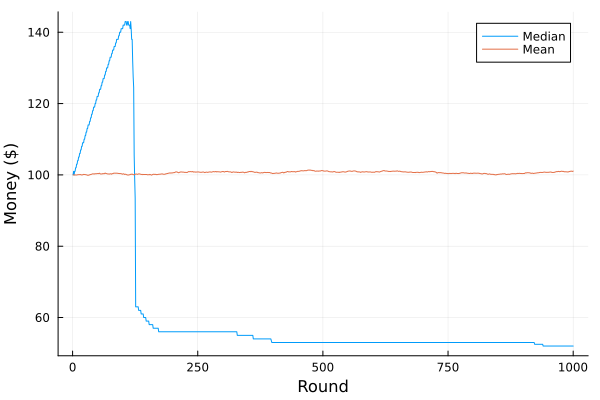

In [120]:
#| echo: false
#| label: fig-median-mean
#| fig-cap: Median and mean money at each round
medians=[median([simulations[i][r] for i in 1:num_simulations]) for r in 1:rounds]
means=[mean([simulations[i][r] for i in 1:num_simulations]) for r in 1:rounds]
plot(medians, label="Median", xlabel="Round", ylabel="Money (\$)")
plot!(means, label="Mean", xlabel="Round", ylabel="Money (\$)") |> display

Finally, we will investigate the probability of being net positive at different stages of the game in @fig-profit-probability. And indeed, after a few rounds, we are almost certain to have made a profit. However, later on, we most likely loose money. So next time you are in a casino, you can use martingale to go out net positive very likely, but be prepared to loose most of it if you stay too long.

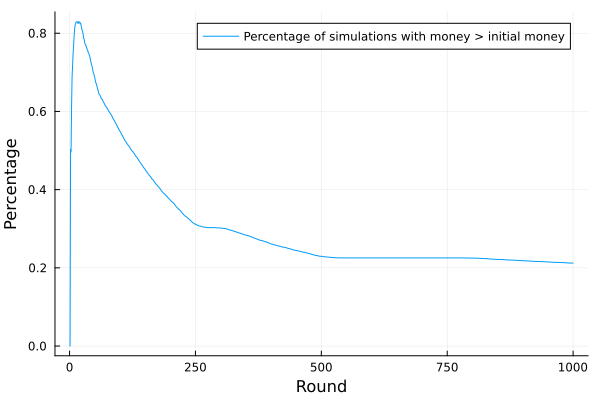

In [122]:
#| echo: false
#| label: fig-profit-probability
#| fig-cap: Percentage of being net positive at each round
percentage_positive=[sum([simulations[i][r] > initial_money for i in 1:num_simulations])/num_simulations for r in 1:rounds]
plot(percentage_positive, label="Percentage of simulations with money > initial money", xlabel="Round", ylabel="Percentage") |> display